In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np




In [5]:
covid_df = pd.read_csv("covid19_Confirmed_dataset.csv")
happiness_df = pd.read_csv("worldwide_happiness_report.csv")

In [6]:
print(covid_df.shape)
print(happiness_df.shape)
covid_df.head()
happiness_df.head()

(266, 104)
(156, 9)


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [7]:
covid_df_clean = covid_df.drop(['Province/State', 'Lat', 'Long'], axis=1)
covid_grouped = covid_df_clean.groupby('Country/Region').sum()
covid_grouped['Total Confirmed'] = covid_grouped.iloc[:, -1]
covid_grouped = covid_grouped[['Total Confirmed']].reset_index()

In [8]:
happiness_df.rename(columns={'Country or region': 'Country/Region'}, inplace=True)

In [9]:
merged_df = pd.merge(happiness_df, covid_grouped, on='Country/Region', how='inner')
merged_df.head()


,Overall rank,Country/Region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Total Confirmed
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,4995
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,9356
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,7738
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,1797
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,39512


In [22]:
numeric_cols = merged_df.select_dtypes(include='number')

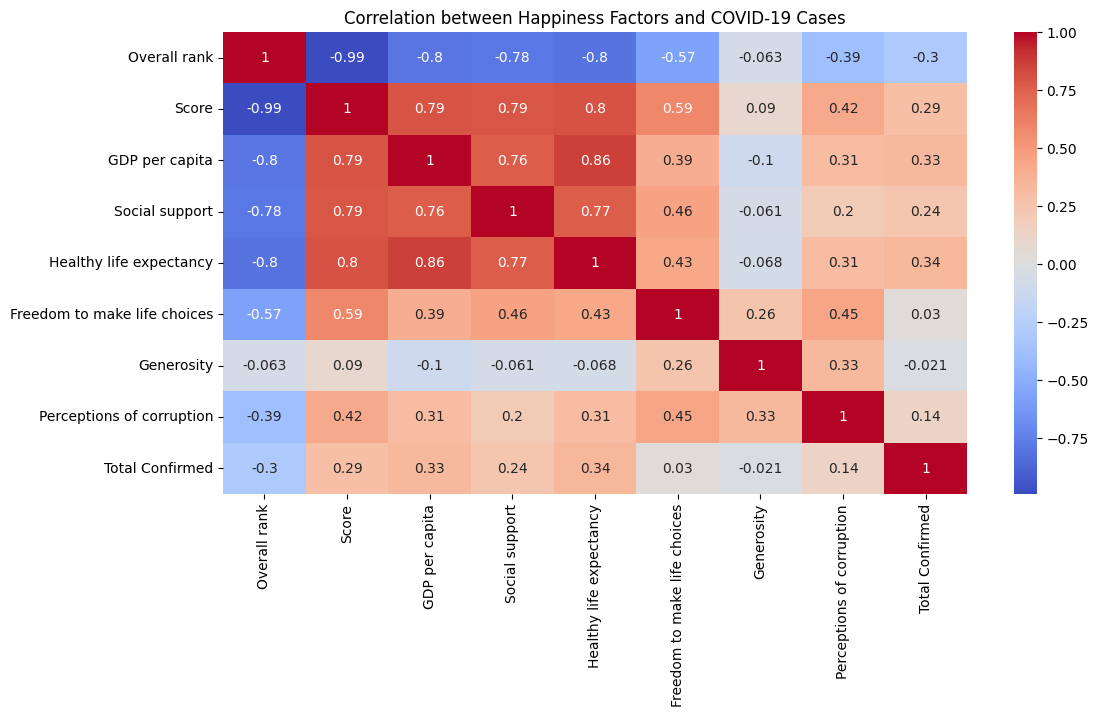

In [23]:
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Happiness Factors and COVID-19 Cases")
plt.show()

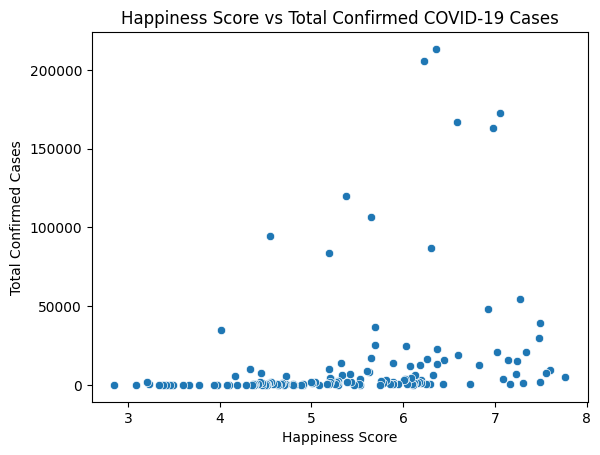

In [11]:
sns.scatterplot(x="Score", y="Total Confirmed", data=merged_df)
plt.title("Happiness Score vs Total Confirmed COVID-19 Cases")
plt.xlabel("Happiness Score")
plt.ylabel("Total Confirmed Cases")
plt.show()

In [13]:
top_happy = merged_df.sort_values(by='Score', ascending=False).head(10)


In [14]:
top_happy

,Overall rank,Country/Region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Total Confirmed
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,4995
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,9356
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,7738
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,1797
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,39512
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343,29586
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373,21092
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380,1479
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308,54457
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226,15452


In [15]:
top_covid = merged_df.sort_values(by='Total Confirmed', ascending=False).head(10)

In [16]:
top_covid

,Overall rank,Country/Region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Total Confirmed
26,30,Spain,6.354,1.286,1.484,1.062,0.362,0.153,0.079,213435
32,36,Italy,6.223,1.294,1.488,1.039,0.231,0.158,0.030,205463
14,15,United Kingdom,7.054,1.333,1.538,0.996,0.450,0.348,0.278,172481
21,24,France,6.592,1.324,1.472,1.045,0.436,0.111,0.183,167299
16,17,Germany,6.985,1.373,1.454,0.987,0.495,0.261,0.265,163009
71,79,Turkey,5.373,1.183,1.360,0.808,0.195,0.083,0.106,120204
61,68,Russia,5.648,1.183,1.452,0.726,0.334,0.082,0.031,106498
106,117,Iran,4.548,1.100,0.842,0.785,0.305,0.270,0.125,94640
28,32,Brazil,6.300,1.004,1.439,0.802,0.390,0.099,0.086,87187
84,93,China,5.191,1.029,1.125,0.893,0.521,0.058,0.100,83956


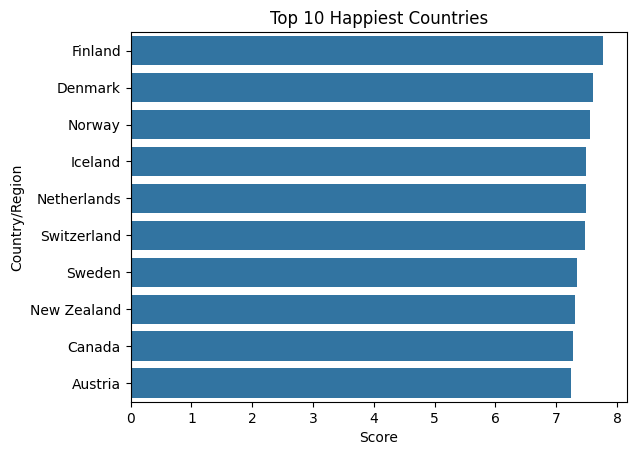

In [17]:
sns.barplot(x='Score', y='Country/Region', data=top_happy)
plt.title('Top 10 Happiest Countries')
plt.show()

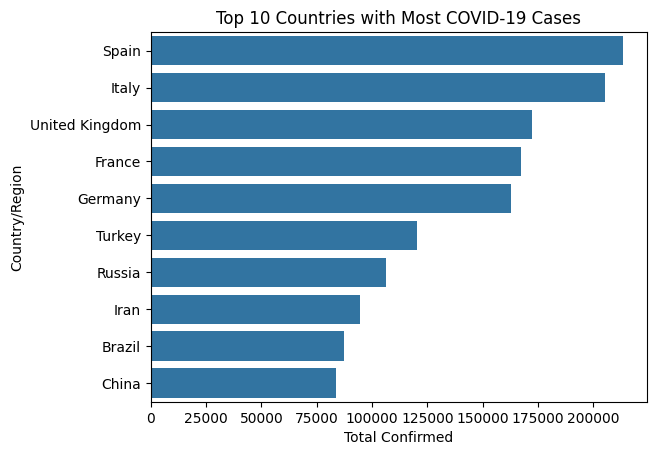

In [18]:
sns.barplot(x='Total Confirmed', y='Country/Region', data=top_covid)
plt.title('Top 10 Countries with Most COVID-19 Cases')
plt.show()


In [19]:
print("""
- Happier countries may have better outcomes, but results vary.
- GDP, social support, and health show some negative correlation with total COVID-19 cases.
- This project gives a surface-level view — deeper analysis is needed for stronger conclusions.
""")


- Happier countries may have better outcomes, but results vary.
- GDP, social support, and health show some negative correlation with total COVID-19 cases.
- This project gives a surface-level view — deeper analysis is needed for stronger conclusions.

